In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [37]:
input_dim = (16, 8, 1)

In [38]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [39]:
model.load_weights('audify_weights.hdf5')

In [40]:
sound=['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
genre_arr=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

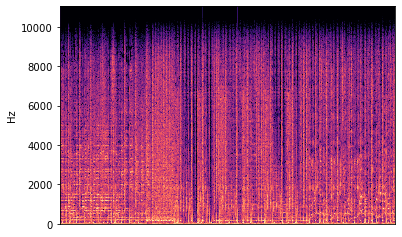

In [11]:
filename='hiphop.00000.wav'
x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mels_specific = np.mean(librosa.feature.melspectrogram(y=x, sr=sample_rate).T,axis=0)
img=librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
ans=librosa.display.specshow(img, y_axis='linear')
plt.savefig("static/pics/out.jpg")
plt.show()

In [42]:
single_in=mels_specific.reshape(1,16,8,1)

In [43]:
pred2=model.predict(single_in)

In [44]:
pred2

array([[5.8874144e-04, 1.2774808e-05, 1.2455467e-11, 4.6782864e-17,
        1.6012239e-04, 1.5458394e-10, 2.8898094e-14, 2.4599078e-06,
        2.5137959e-14, 9.9923587e-01]], dtype=float32)

In [45]:
for i,s in enumerate(pred2[0]):
    if(s>1e-4):
        print(sound[i])

air_conditioner
drilling
street_music


In [46]:
sound[np.argmax(pred2)]

'street_music'

In [47]:
model_genre = Sequential()
model_genre.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model_genre.add(MaxPool2D(pool_size=(2, 2)))
model_genre.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model_genre.add(MaxPool2D(pool_size=(2, 2)))
model_genre.add(Dropout(0.1))
model_genre.add(Flatten())
model_genre.add(Dense(1024, activation = "tanh"))
model_genre.add(Dense(10, activation = "softmax"))

In [48]:
model_genre.load_weights('audify_weights_genre.hdf5')

In [49]:
genre_pred=model_genre.predict(single_in)

In [50]:
genre_pred

array([[9.9999666e-01, 2.5190452e-19, 1.6995479e-10, 4.0838589e-18,
        2.2500742e-15, 1.4940408e-18, 2.9257603e-17, 1.6689658e-14,
        2.1657396e-09, 3.3675519e-06]], dtype=float32)

In [51]:
genre_arr[np.argmax(genre_pred)]

'blues'

In [97]:
x1, sample_rate1 = librosa.load('t1.wav', res_type='kaiser_fast')
x2, sample_rate2 = librosa.load('t2.wav', res_type='kaiser_fast')

In [98]:
fin=x1+1.5*x2
fin

array([ 0.01814515,  0.0202877 ,  0.01789281, ..., -0.03620626,
        0.00335447,  0.00561816], dtype=float32)

In [99]:
import soundfile as sf
sf.write('fin.wav', fin, sample_rate1, 'PCM_24')